## Instructions
You are the product analyst for an e-commerce site that sells unique all-occasion gifts mainly to wholesalers. Your job is to identify who are the best customers when it comes to sales.

## Download Dataset
https://archive.ics.uci.edu/ml/datasets/Online+Retail

## Deliverable
A short presentation of your analysis, key insights, and recommendations to the team as to which customers are the best customers to target for its new promotions.


# Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_excel('Online_Retail.xlsx')

In [3]:
# convert xlsx to parquet file, via csv as a middle man for better performance (load data faster)
'''
df.to_csv(r'online_retail.csv', index = False)
df_csv = pd.read_csv('online_retail.csv')
df_csv.InvoiceDate = pd.to_datetime(df_csv['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
df_csv.to_parquet('online_retail.parquet.gzip',compression='gzip')
'''
df = pd.read_parquet('online_retail.parquet.gzip')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum() # missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
135080/541909 # 25% records should be removed

0.249266943342886

#condition = df[(df['Description'].isnull()) & (df['CustomerID'].isnull()) &  (df['UnitPrice']== 0)]
#1454 records where Desciption, CustomerID, UnitPrice are all null
#[Action] Remove those records
#df_filter = df.drop(condition.index)
# Data Cleaning

In [9]:
df_drop_na = df.dropna() 

In [10]:
df_drop_na.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df_drop_na.duplicated().sum()

5225

In [12]:
df_no_duplicate = df_drop_na.drop_duplicates()
df_no_duplicate.shape

(401604, 8)

In [13]:
df_no_duplicate.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [15]:
cancelled_invoice = df_no_duplicate[df_no_duplicate['InvoiceNo'].str.startswith('C', na = False)]
cancelled_invoice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [16]:
df_no_duplicate[(df_no_duplicate['InvoiceNo']=='C581490') & (df_no_duplicate['CustomerID']==14397)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom


In [17]:
df_remove_cancelled_invoice = df_no_duplicate.drop(cancelled_invoice.index) # Remove cancelled invoices

In [18]:
8872/401604 # 2% data to be excluded in our analysis

0.02209141343213713

In [19]:
df_remove_cancelled_invoice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      392732 non-null object
StockCode      392732 non-null object
Description    392732 non-null object
Quantity       392732 non-null int64
InvoiceDate    392732 non-null datetime64[ns]
UnitPrice      392732 non-null float64
CustomerID     392732 non-null float64
Country        392732 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [20]:
data = df_remove_cancelled_invoice.copy() #Copy data for our next stage - Data Analysis

# RFM

## Behavioral segmentation by 3 important features:
Recency — number of days since the last purchase
Frequency — number of transactions made over a given period
Monetary — amount spent over a given period of time

We will then have to group these features by:
Percentiles or quantiles
Pareto Rule — 80/20
Business Acumen

Now, let's analyze the customers' purchase behaviour

In [21]:
from datetime import timedelta
print(data.InvoiceDate.min())
print(data.InvoiceDate.max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      392732 non-null object
StockCode      392732 non-null object
Description    392732 non-null object
Quantity       392732 non-null int64
InvoiceDate    392732 non-null datetime64[ns]
UnitPrice      392732 non-null float64
CustomerID     392732 non-null float64
Country        392732 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [23]:
snapshot_date = data['InvoiceDate'].max() + timedelta(days=1) # Create a variable for flexible reporting date
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [24]:
data['sales_revenue'] = data['UnitPrice']*data['Quantity'] # Monetary Values
data.head()
# number of days that passed by after the client was last contacted from a previous campaign  
final_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 
    'InvoiceNo':'count', 
    'sales_revenue':'sum'})
final_data.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','sales_revenue':'Monetary'}, inplace=True)
data_RFM = final_data.copy() # Copy data for RFM analysis
data_z_score = final_data.copy() # Copy data for z-score normalization
data_min_max = final_data.copy() # Copy data for min-max normalization
data_RFM.describe()



,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.518322,90.512100,2048.215924
std,100.009747,225.515328,8984.248352
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,306.455000
50%,51.000000,41.000000,668.560000
75%,142.000000,98.000000,1660.315000
max,374.000000,7676.000000,280206.020000


In [25]:
# Customer Segmentation by RFM
r_label = range(4,0, -1)
data_RFM['recency_rank'] = pd.qcut(data_RFM.Recency, 4, labels = r_label)
f_label = range(1,5)
data_RFM['frequency_rank'] = pd.qcut(data_RFM.Frequency, 4, labels = f_label)
m_label = range(1,5)
data_RFM['monetary_rank'] = pd.qcut(data_RFM.Monetary, 4, labels = m_label)
data_RFM['RFM_label'] = data_RFM['recency_rank'].astype('str') + data_RFM['frequency_rank'].astype('str') + data_RFM['monetary_rank'].astype('str')
data_RFM['RFM_score'] = data_RFM[['recency_rank','frequency_rank','monetary_rank']].sum(1)

In [26]:
# Parento 80/20 rules
top25_sales_revenue = data_RFM[data_RFM.monetary_rank == 4 ].Monetary.sum()
total_sales_revenue = data_RFM.Monetary.sum()
business_values = round(100*top25_sales_revenue/total_sales_revenue,0)
print(f'{business_values} percent of sales revenue was controlled by 25% of customers')

79.0 percent of sales revenue was controlled by 25% of customers


In [27]:
data_RFM.head()

,Recency,Frequency,Monetary,recency_rank,frequency_rank,monetary_rank,RFM_label,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0


In [28]:
def customer_segmentation(x):
    
    if x >= 9:
        return 'Champions'
    elif (x >= 8) & (x < 9):
        return 'Can\'t lose them'
    elif (x >= 7) & (x < 8):
        return 'Loyal'
    elif (x >= 6) & (x < 7):
        return 'Potential'
    elif (x >= 5) & (x < 6):
        return 'Promising'
    elif (x >= 4) & (x < 5):
        return 'Require Attention'
    else:
        return 'Require Activation'

data_RFM['customer_segments'] = data_RFM['RFM_score'].apply(customer_segmentation)

In [29]:
customer_segments_summary = data_RFM.groupby('customer_segments')['RFM_score'].count().reset_index()
customer_segments_summary

,customer_segments,RFM_score
0,Can't lose them,454
1,Champions,1677
2,Loyal,464
3,Potential,457
4,Promising,518
5,Require Activation,381
6,Require Attention,388


In [30]:
100*(454+1677+464)/customer_segments_summary.RFM_score.sum() 
# The first three customer segments account for 60% sales. They are our VIPs.

59.806407006222635

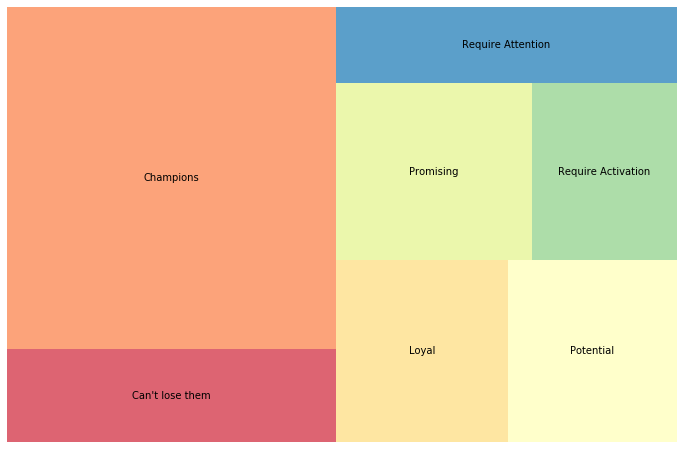

In [31]:
import squarify
# https://clevertap.com/blog/rfm-analysis/#:~:text=Champions%20are%20your%20best%20customers,who%20spent%20a%20good%20amount.
labels = customer_segments_summary['customer_segments']
size = customer_segments_summary['RFM_score']
color_list = ['#d53e4f','#fc8d59','#fee08b','#ffffbf','#e6f598','#99d594','#3288bd']
plt.figure(figsize=(12,8))
squarify.plot(sizes=size, color=color_list,  label=labels, alpha=0.8 )
plt.axis('off')
plt.show()


In [32]:
''' An alternative to do the customer segmentation. The segments can be divided further for refinement 
in accordance to the business needs '''

def alternative_customer_segmentation2(x):
 # Describe segments - key features of each segment by Recency, Frequency & Monetary values 
    if x in ['444','443','434','433','344']:
        return 'Champions' # bought most recently, most often, and are heavy spenders
    elif x in ['343','344', '334','333']:
        return 'Potential Loyalists' # recent customers (3/4) with average frequency (2/3)and who spent a good amount(3/4)
    elif x in ['424', '423', '324', '323']:
        return 'New Customers' # high overall RFM score (3/4)but are not frequent shoppers (1/2)
    elif x in ['414', '413', '424', '423', '314', '313', '324','323']:
        return 'At Risk Customers' # purchased often and spent big amounts, (3/4) but haven’t purchased recently(1/2)
    elif x in ['244', '243', '234', '233', '144', '143', '134', '133']:
        return 'Can’t Lose Them' # used to visit and purchase quite often(3/4), but haven’t been visiting recently
    elif x in ['422', '232', '322', '312', '232', '224', '223', '222']: 
        return 'Require Attention' # average spenders (2/3/4)
    else:
        return 'Require Activation'
data_RFM['customer_segments2'] = data_RFM['RFM_label'].apply(alternative_customer_segmentation2)


In [33]:
customer_segments_summary2 = data_RFM.groupby('customer_segments2')['RFM_label'].count().reset_index()
customer_segments_summary2

,customer_segments2,RFM_label
0,At Risk Customers,41
1,Can’t Lose Them,488
2,Champions,986
3,New Customers,122
4,Potential Loyalists,305
5,Require Activation,1835
6,Require Attention,562


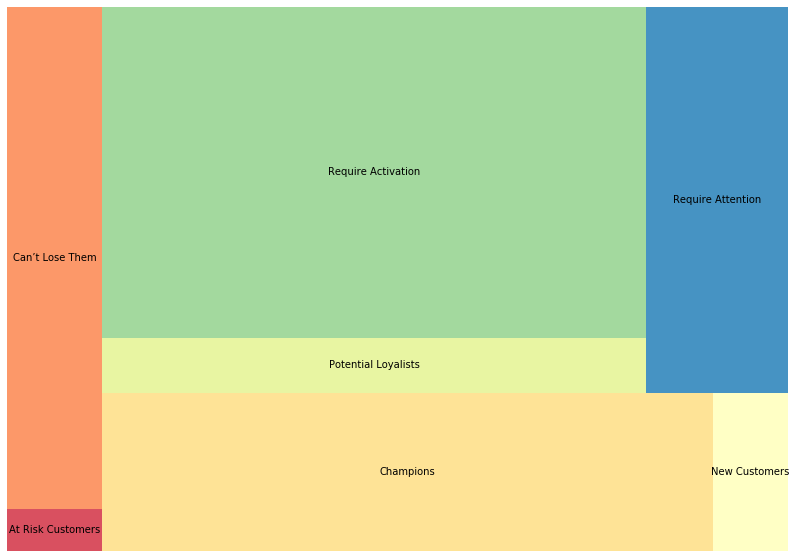

In [34]:
labels = customer_segments_summary2['customer_segments2']
size = customer_segments_summary2['RFM_label']
color_list = ['#d53e4f','#fc8d59','#fee08b','#ffffbf','#e6f598','#99d594','#3288bd']
plt.figure(figsize=(14,10))
squarify.plot(sizes=size, color=color_list,  label=labels, alpha=0.9 )
plt.axis('off')
plt.show()

## Champions
Your best customers, who bought most recently, most often, and are heavy spenders. 
--> Reward these customers. They can become early adopters for new products and will help promote your brand.

## Potential Loyalists 
Your recent customers with average frequency and who spent a good amount. 
--> Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.

## New Customers
Your customers who have a high overall RFM score but are not frequent shoppers. 
--> Start building relationships with these customers by providing onboarding support and special offers to increase their visits.

## At Risk Customers 
Your customers who purchased often and spent big amounts, but haven’t purchased recently. 
--> Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

## Can’t Lose Them
Customers who used to visit and purchase quite often, but haven’t been visiting recently.
--> Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

# Champions are the best customers when it comes to sales and they are also the best group to target for the new promotions

https://towardsdatascience.com/rfmt-segmentation-using-k-means-clustering-76bc5040ead5
# Cohort Analysis to identify the common pattern or behaviour

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo        392732 non-null object
StockCode        392732 non-null object
Description      392732 non-null object
Quantity         392732 non-null int64
InvoiceDate      392732 non-null datetime64[ns]
UnitPrice        392732 non-null float64
CustomerID       392732 non-null float64
Country          392732 non-null object
sales_revenue    392732 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [36]:
import datetime as dt
data['formatted_InvoiceDate'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1)) # Group dates by month

In [37]:
data['cohort_month'] = data.groupby('CustomerID')['formatted_InvoiceDate'].transform('min')

In [38]:
def get_year_month(x):
  return x.dt.year, x.dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 11 columns):
InvoiceNo                392732 non-null object
StockCode                392732 non-null object
Description              392732 non-null object
Quantity                 392732 non-null int64
InvoiceDate              392732 non-null datetime64[ns]
UnitPrice                392732 non-null float64
CustomerID               392732 non-null float64
Country                  392732 non-null object
sales_revenue            392732 non-null float64
formatted_InvoiceDate    392732 non-null datetime64[ns]
cohort_month             392732 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 36.0+ MB


In [39]:
invoice_year, invoice_month = get_year_month(data.formatted_InvoiceDate)
cohort_year, cohort_month = get_year_month(data.cohort_month)

In [40]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [41]:
data['cohort_index'] = year_diff * 12 + month_diff + 1

In [42]:
temp = data[['cohort_month', 'cohort_index', 'CustomerID']].drop_duplicates()
cohort_pivot = pd.pivot_table(temp, index ='cohort_month', columns ='cohort_index', aggfunc='count') # Count Active Customers
cohort_pivot

CustomerID                                                   \
cohort_index         1      2      3      4      5      6      7      8    
cohort_month                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01        284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01        169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01        299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01        358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        324.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
cohort_index     9      10     11     12     13  
cohort_month                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [43]:
cohort_sizes = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)
retention = (retention * 100).round(1)
retention

CustomerID                                                        \
cohort_index         1     2     3     4     5     6     7     8     9     10   
cohort_month                                                                    
2010-12-01        100.0  36.6  32.3  38.4  36.3  39.8  36.3  34.9  35.4  39.5   
2011-01-01        100.0  22.1  26.6  23.0  32.1  28.8  24.7  24.2  30.0  32.6   
2011-02-01        100.0  18.7  18.7  28.4  27.1  24.7  25.3  27.9  24.7  30.5   
2011-03-01        100.0  15.0  25.2  19.9  22.3  16.8  26.8  23.0  27.9   8.6   
2011-04-01        100.0  21.3  20.3  21.0  19.7  22.7  21.7  26.0   7.3   NaN   
2011-05-01        100.0  19.0  17.3  17.3  20.8  23.2  26.4   9.5   NaN   NaN   
2011-06-01        100.0  17.4  15.7  26.4  23.1  33.5   9.5   NaN   NaN   NaN   
2011-07-01        100.0  18.1  20.7  22.3  27.1  11.2   NaN   NaN   NaN   NaN   
2011-08-01        100.0  20.7  24.9  24.3  12.4   NaN   NaN   NaN   NaN   NaN   
2011-09-01        100.0  23.4  30.1  11.4   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01        100.0  24.0  11.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01        100.0  11.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01        100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                
cohort_index    11    12    13  
cohort_month                    
2010-12-01    37.4  50.3  26.6  
2011-01-01    36.5  11.8   NaN  
2011-02-01     6.8   NaN   NaN  
2011-03-01     NaN   NaN   NaN  
2011-04-01     NaN   NaN   NaN  
2011-05-01     NaN   NaN   NaN  
2011-06-01     NaN   NaN   NaN  
2011-07-01     NaN   NaN   NaN  
2011-08-01     NaN   NaN   NaN  
2011-09-01     NaN   NaN   NaN  
2011-10-01     NaN   NaN   NaN  
2011-11-01     NaN   NaN   NaN  
2011-12-01     NaN   NaN   NaN

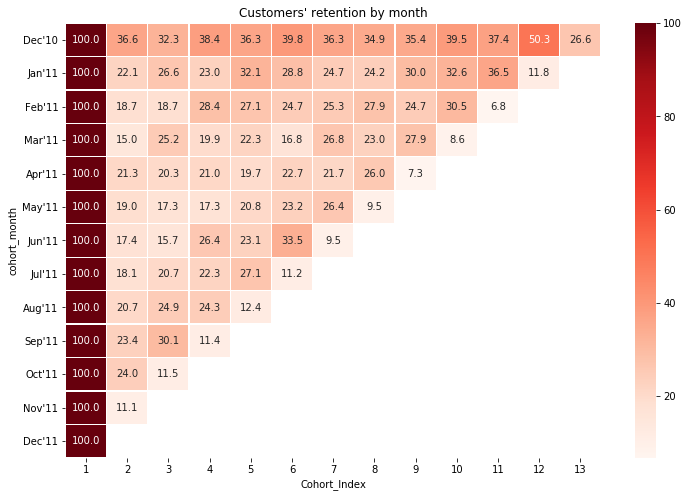

In [44]:

index_list = range(1, 14,1)
plt.figure(figsize = (12, 8))
plt.title('Customers\' retention by month')
#https://www.programiz.com/python-programming/datetime/strftime
y_labels = list(map(lambda x: dt.datetime.fromtimestamp(x/1000000000).strftime('%b\'%y'), retention.index.values.tolist()))
ax = sns.heatmap(retention, cmap="Reds", annot = True, fmt = '.1f', linewidth = 0.3, xticklabels = index_list, yticklabels=y_labels)
plt.xlabel('Cohort_Index')
plt.show()

# Findings
It is noticeable that 50.3% users returned from cohort Dec'10 in November 2011. We can investigate the reasons behind this change (e.g. Was there a marketing campaign which caused this change?)

In [45]:
cohort_data = data.groupby(['cohort_month', 'cohort_index']).nunique()
cohort_data

InvoiceNo  StockCode  Description  Quantity  \
cohort_month cohort_index                                                
2010-12-01   1                  1400       2411         2418       105   
             2                   517       1786         1787        81   
             3                   458       1694         1697        78   
             4                   582       1830         1834        83   
             5                   504       1775         1781        71   
             6                   651       1829         1851        87   
             7                   572       1854         1871        95   
             8                   547       1935         1954        89   
             9                   539       1933         1952       102   
             10                  642       2127         2138       116   
             11                  628       2049         2079       113   
             12                  945       2267         2286       116   
             13                  335       1752         1754        80   
2011-01-01   1                   470       1813         1808        63   
             2                   117        970          976        50   
             3                   149       1113         1115        52   
             4                   125        961          962        51   
             5                   186       1121         1133        49   
             6                   161       1178         1180        59   
             7                   145       1097         1098        53   
             8                   135       1140         1149        54   
             9                   163       1312         1313        51   
             10                  191       1463         1491        54   
             11                  246       1661         1669        65   
             12                   65        771          772        44   
2011-02-01   1                   423       1761         1761        57   
             2                    90        758          758        42   
             3                    94        972          973        48   
             4                   147        978          998        41   
             5                   124        953          956        43   
...                              ...        ...          ...       ...   
2011-05-01   7                   104        927          929        38   
             8                    30        540          540        27   
2011-06-01   1                   270       1701         1702        52   
             2                    53        633          631        42   
             3                    45        508          506        28   
             4                    79        868          869        42   
             5                    70        948          953        38   
             6                   117       1110         1110        46   
             7                    27        450          451        27   
2011-07-01   1                   213       1641         1643        48   
             2                    38        415          417        29   
             3                    51        811          812        28   
             4                    48        792          793        30   
             5                    70        871          870        30   
             6                    22        406          406        21   
2011-08-01   1                   182       1652         1658        45   
             2                    42        969          968        38   
             3                    59       1185         1190        36   
             4                    53       1172         1182        54   
             5                    22        762          762        34   
2011-09-01   1                   336       1799         1809        60   
             2                 

# K-Mean Clustering
- Assumption
- Check distribution of data (Normal distribution)

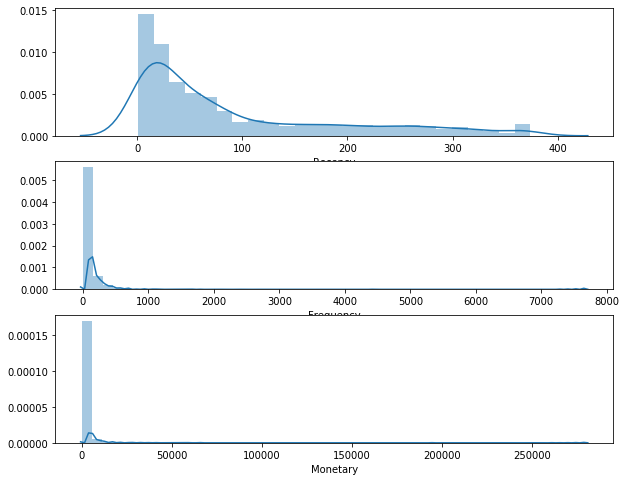

In [46]:
plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
sns.distplot(data_RFM.Recency) # Right-skewed distribution
plt.subplot(3,1,2)
sns.distplot(data_RFM.Frequency) # Right-skewed distribution
plt.subplot(3,1,3)
sns.distplot(data_RFM.Monetary) # Right-skewed distribution

In [47]:
# Z-score normalization 
# Handles outliers, but does not produce normalized data with the exact same scale.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_z_score)
z_score_normalized_data = pd.DataFrame(scaler.transform(data_z_score))
z_score_normalized_data.describe().round(2)

,0,1,2
count,4339.00,4339.00,4339.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.92,-0.40,-0.23
25%,-0.75,-0.33,-0.19
50%,-0.42,-0.22,-0.15
75%,0.49,0.03,-0.04
max,2.81,33.64,30.96


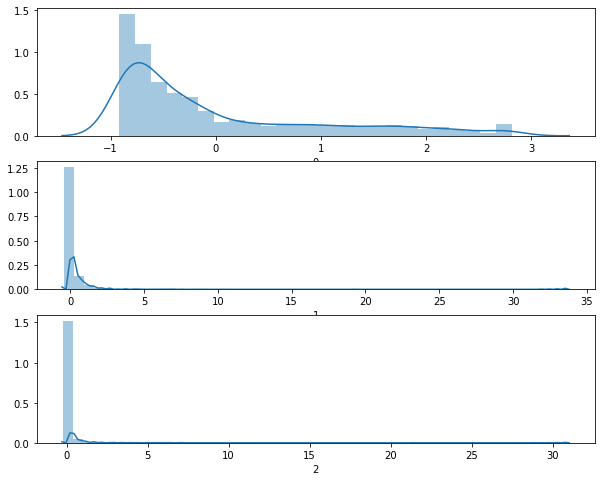

In [48]:
plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
sns.distplot(z_score_normalized_data[0]) # Right-skewed distribution
plt.subplot(3,1,2)
sns.distplot(z_score_normalized_data[1]) # Right-skewed distribution
plt.subplot(3,1,3)
sns.distplot(z_score_normalized_data[2]) # Right-skewed distribution

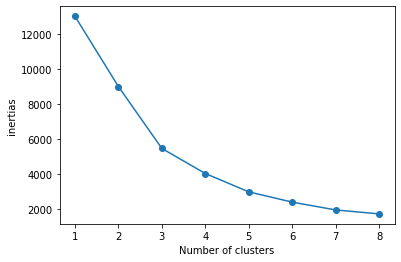

In [49]:
from sklearn.cluster import KMeans
num_clusters = list(range(1,9))
inertias = []

for i in num_clusters:
  model = KMeans(n_clusters = i)
  model.fit(z_score_normalized_data)
  inertias.append(model.inertia_)

plt.plot(num_clusters,inertias, '-o' )
plt.xlabel('Number of clusters')
plt.ylabel('inertias')
plt.show()

In [50]:
model = KMeans(n_clusters=3, init='k-means++', random_state = 42)
model.fit(z_score_normalized_data)
data_z_score['Cluster'] = model.labels_
data_z_score.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(0)

,Recency,Frequency,Monetary
Cluster,,,
0,247.0,27.0,636.0
1,41.0,102.0,2022.0
2,5.0,2537.0,125981.0


# Conclusion
Cluster 0 performed poorly across R, F, and M — we need to design campaigns to re-activate them

Cluster 1 spent quite a fair amount and quite frequently but has not shopped with us recently. We need to do something before we lose them

Cluster 2 had the highest MontaryValue mean and lowest Recency mean and the highest frequency mean — This is our best customer segment

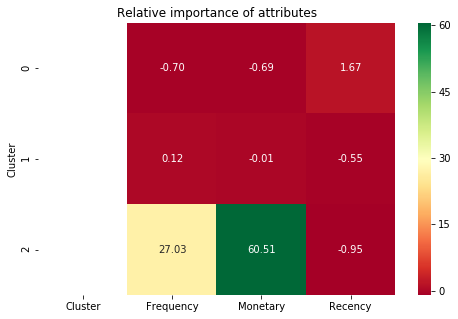

In [51]:
# Calculate average RFM values for each cluster
cluster_avg = data_z_score.groupby(['Cluster']).mean()
# Calculate average RFM values for the total customer population
population_avg = data_z_score.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1 # ensures 0 is returned when cluster average equals population average


# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 5))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

Text(0, 0.5, 'Monetary Values')

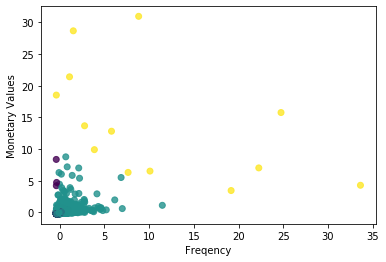

In [52]:
plt.scatter(z_score_normalized_data[1], z_score_normalized_data[2], c = data_z_score.Cluster, alpha = 0.8)
plt.xlabel('Freqency')
plt.ylabel('Monetary Values')

In [53]:
# Min-Max normalization
# Guarantees all features will have the exact same scale but does not handle outliers well.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_min_max)
min_max_normalized_data = pd.DataFrame(scaler.transform(data_min_max))
min_max_normalized_data.describe().round(2)

,0,1,2
count,4339.00,4339.00,4339.00
mean,0.25,0.01,0.01
std,0.27,0.03,0.03
min,0.00,0.00,0.00
25%,0.05,0.00,0.00
50%,0.13,0.01,0.00
75%,0.38,0.01,0.01
max,1.00,1.00,1.00


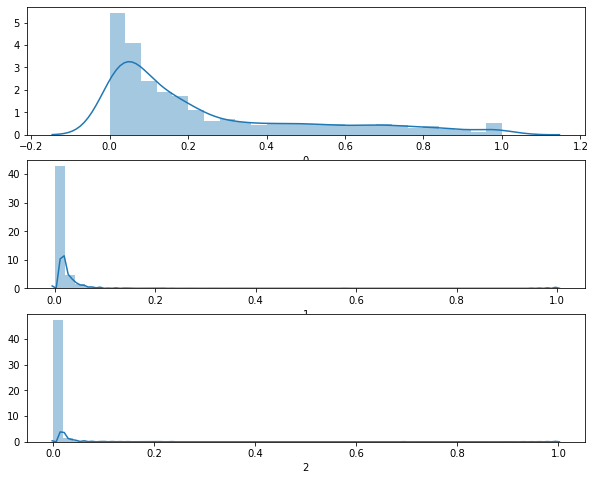

In [54]:
plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
sns.distplot(min_max_normalized_data[0]) # Right-skewed distribution
plt.subplot(3,1,2)
sns.distplot(min_max_normalized_data[1]) # Right-skewed distribution
plt.subplot(3,1,3)
sns.distplot(min_max_normalized_data[2]) # Right-skewed distribution

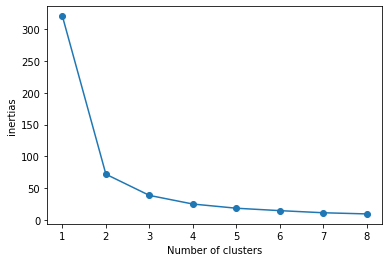

In [55]:
num_clusters = list(range(1,9))
inertias = []

for i in num_clusters:
  model = KMeans(n_clusters = i)
  model.fit(min_max_normalized_data)
  inertias.append(model.inertia_)

plt.plot(num_clusters,inertias, '-o' )
plt.xlabel('Number of clusters')
plt.ylabel('inertias')
plt.show()

In [56]:
model = KMeans(n_clusters=3, init='k-means++', random_state = 42)
model.fit(min_max_normalized_data)
data_min_max['Cluster'] = model.labels_
data_min_max.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(0)

,Recency,Frequency,Monetary
Cluster,,,
0,294.0,23.0,606.0
1,32.0,119.0,2706.0
2,153.0,40.0,795.0


# Conclusion
Cluster 0 performs poorly across R, F, M — we will need to design campaigns to re-activate them 

Cluster 1 has the highest MontaryValue mean and lowest Recency mean and the highest Frequency mean — This is our best customer segment

Cluster 2 spent quite a fair amount and frequently but has not shopped with us in 5 months. We need to do something before we lose them

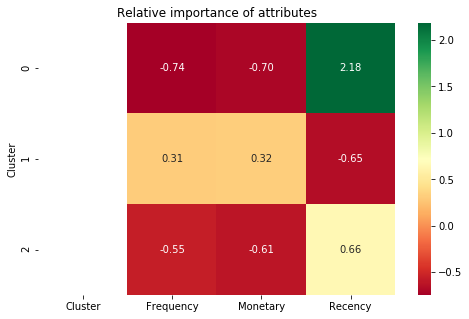

In [57]:
# Calculate average RFM values for each cluster
cluster_avg = data_min_max.groupby(['Cluster']).mean()
# Calculate average RFM values for the total customer population
population_avg = data_min_max.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1 # ensures 0 is returned when cluster average equals population average


# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 5))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()